[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MBanuelos/grad-numerical/blob/main/week11.ipynb)

**Name:** [Type Your Name Here]

# Week 11 Participation

---

To begin all assignments (whether participation or homework), please save a copy of this notebook to your Google Drive by clicking **File -> Save a copy in Drive**

---


## Solving the Heat Eq.

Read and review Sections 6.1 - 6.4 from [the textbook](https://numericalmethodssullivan.github.io/ch-pdes.html).

and answer the following

Consider the time dependent heat equation in one dimension

$$
u_t = D \; u_{xx}
$$
    
in 1 spatial dimension.  Note that $D$ is the diffusivity (the rate of diffusion) so in terms of physical problems, if $D$ is small then the diffusion occurs slowly and if $D$ is large then the diffusion occurs quickly.

We want to build a numerical approximation to the function $u(t,x)$ for a given collection of initial and boundary conditions.

First we need to introduce some notation for the numerical solution. As you'll see in a moment, there is a lot to keep track of in numerical PDEs so careful index and well-chosen notation is essential. Let $U_i^n$ be the approximation of the solution to $u(t,x)$ at the point $t=t_n$ and $x=x_i$ (since we have two variables we need to two indices). For example, $U_4^1$ is the value of the approximation at time $t_1$ and at the spatial point $x_4$.

Next, we need to approximate both derivatives $u_t$ and $u_{xx}$ in the PDE using methods that we have used before. Now, would be a good time to go back to review your notes for how we build approximations of derivatives.


---



a) Give an approximation of $u_t$, similar to Euler's method

$$
u_t \approx \frac{??? - ???}{???}.
$$

ANS:

b) Give an approximation of $u_{xx}$ using the approximation for the second derivative from HW 03

$$
u_{xx} \approx \frac{??? - ??? + ???}{???}.
$$

ANS:

c) Put your answers from parts (a) and (b) together using the 1D heat equation

$$
\frac{??? - ???}{\Delta t} = D \left( \frac{??? - ??? + ???}{\Delta x^2} \right).
$$

Be sure that your indexing is correct: the superscript $n$ is the index for time and the subscript $i$ is the index for space.

ANS:

d) Rearrange your result from part (c) to solve for $U_i^{n+1}$

$$
U_i^{n+1} = ??? + \frac{D \Delta t}{\Delta x^2} \left( ??? - ??? + ??? \right).
$$

ANS:

e) Read the first 3 pages of [these lecture notes](http://people.uncw.edu/hermanr/pde1/NumHeatEqn.pdf) and compare them with what you derived above.

ANS:

f) What do you think the expected error for this method is?



ANS:

**Practice**

Now we want to implement your answers of the previous exercise to approximate the solution to the following problem:

$$
\text{Solve: } u_t = 0.5u_{xx}
$$

with

$$
x \in (0,1), \, u(0,x) = \sin(2 \pi x), \, u(t,0) = 0, \, \text{and} \, u(t,1) = 0.
$$

**Q:** What is the analytical solution to this equation?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import interactive

# Write code to give an array of times starting at t=0 and ending
# at t=1.  Be sure that you use many points in the partition of
# the time domain.  Be sure to either specify or calculate the
# value of Delta t.
dt = 0.00005
t = np.linspace(0,1,int(np.floor(1/dt)+1))
#print(t)
# Write code to give an array of x values starting at x=0 and
# ending exactly at x=1. This is best done with the np.linspace()
# command since you can guarantee that you end exactly at x=1.
# Be sure to either specify or calculate the value of Delta x as
# part of your code.
dx = 0.01
x = np.linspace(0,1,int(np.floor(1/dx)+1))
#print(x)
# The next two lines build two parameters that are of interest
# for the finite difference scheme.
D = 0.5 # The diffusion coefficient for the heat equation given.
# The coefficient "a" appears in the finite difference scheme.
a = D*dt / (dx**2)
print("dt=",dt,", dx=",dx," and D dt/dx^2=",a)

dt= 5e-05 , dx= 0.01  and D dt/dx^2= 0.25


Next we build the array $U$ so we can store all of the approximations at all times and at all spatial points. The array will have the dimensions `len(t)` versus `len(x)`. We then need to enforce the boundary conditions so for all times we fill the proper portions of the array with the proper boundary conditions. Lastly, we will build the initial condition for all spatial steps in the first time step.

In [ ]:
U = np.zeros( (len(t),len(x)) )
# left boundary condition
# right boundary condition
# the function for the init. condition (should depend on x)

Now we step through a loop that fills the $U$ array one row at a time. Keep in mind that we want to leave the boundary conditions fixed so we will only fill indices `1` through `-2` (stop and explain this). Be careful to get the indexing correct. For example, if we want $U_i^n$, we use `U[n,1:-1]`, if we want $U_{i+1}^n$, we use `U[n,2:]`, if we want $U_i^{n+1}$ we use `U[n+1,1:-1]`

In [ ]:
for n in range(len(t)-1):
    ...

Now, let's plot the solution

In [ ]:
def plotter(Frame):
    plt.plot(x,U[Frame,:],'b')
    plt.grid()
    plt.ylim(-1,1)
    plt.show()
interactive_plot = interactive(plotter, Frame=(0,len(t)-1,1))
interactive_plot

interactive(children=(IntSlider(value=10000, description='Frame', max=20000), Output()), _dom_classes=('widget…

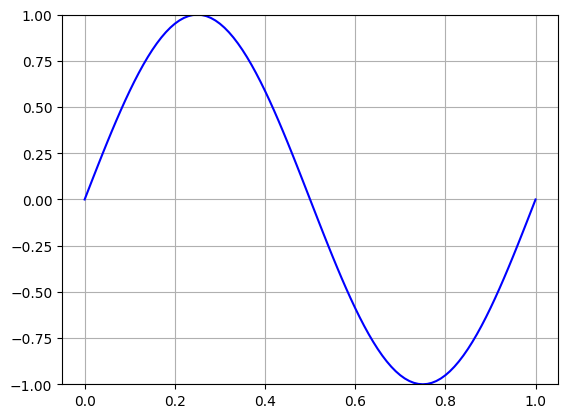

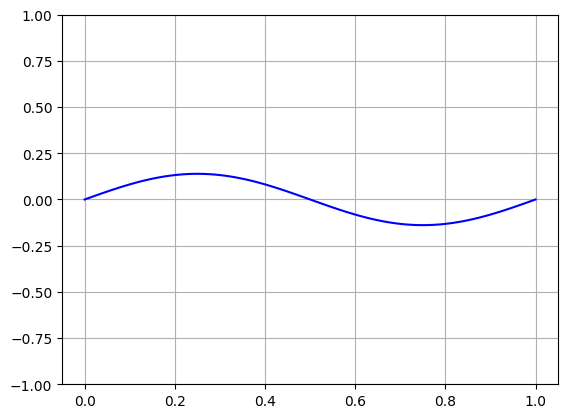

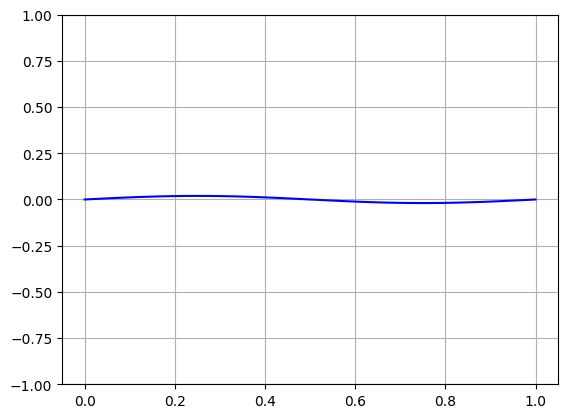

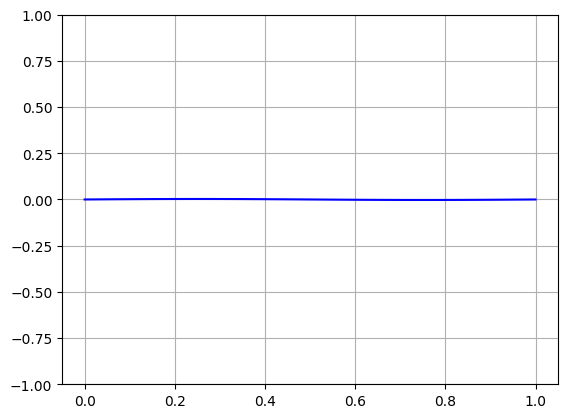

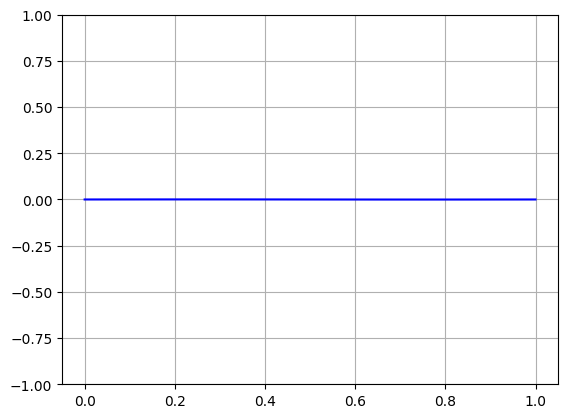

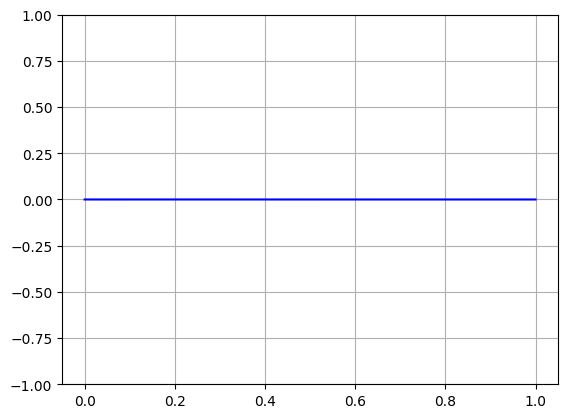

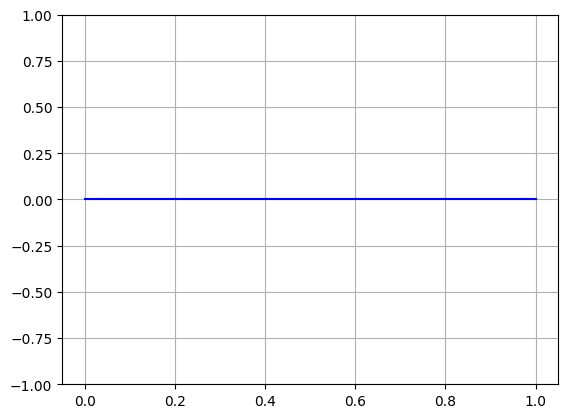

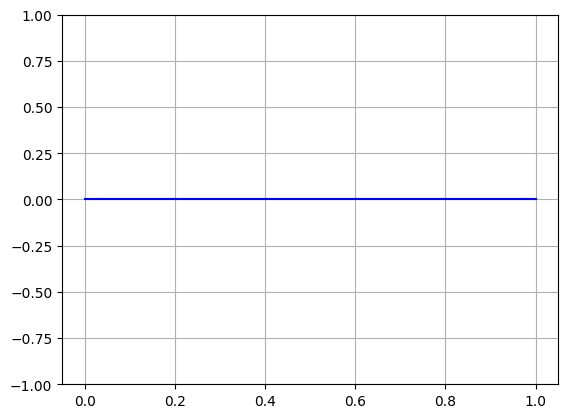

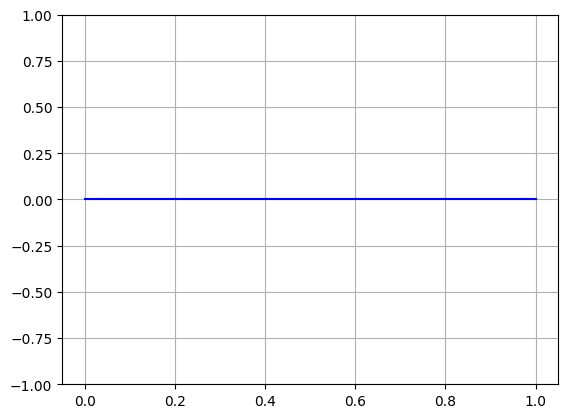

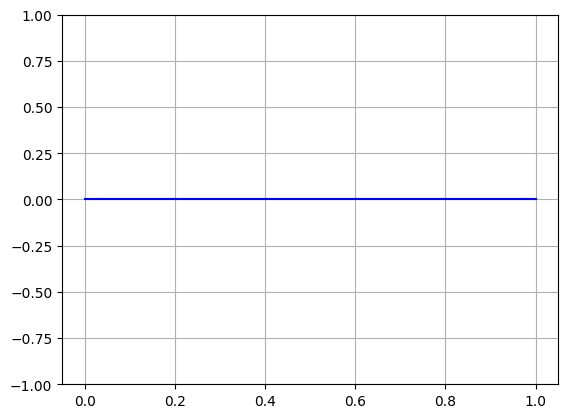

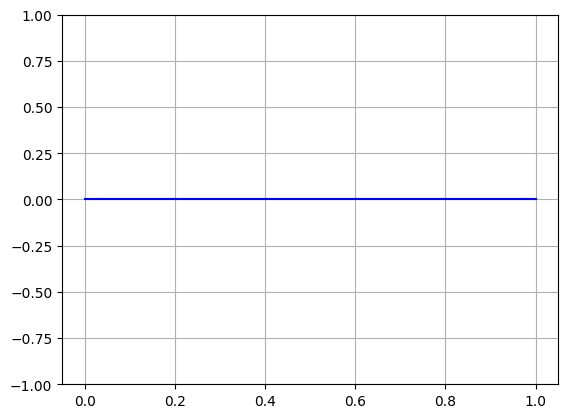

In [ ]:
for Frame in range(0,len(t),2000): # ex: build every 20th frame
    plotter(Frame)

**Practice**

You may have found that you didn't get a sensible solution out for the previous problem. The point of this exercise is to show that value of $a = D\frac{\Delta t}{\Delta x^2}$ controls the stability of the finite difference solution to the heat equation, and furthermore that there is a cutoff for $a$ below which the finite difference scheme will be stable. Experiment with values of $\Delta t$ and $\Delta x$ and conjecture the values of  

$$
a = D\frac{\Delta t}{\Delta x^2}
$$

that give a stable result. Your conjecture should take the form:

If $a = D\frac{\Delta t}{\Delta x^2} < ??$, then the finite difference solution for the 1D heat equation is stable. Otherwise it is unstable.

ANS:

**Practice**

Consider the one dimensional heat equation with diffusion coefficient $D=1$:

$$
u_t = u_{xx}
$$

We want to solve this equation on the domain $x \in (0,1)$ and $t\in (0, 0.5)$ subject to the initial condition $u(0,x) = \sin(\pi x )$ and the boundary conditions $u(t,0)=u(t,1)=0$.

a) Prove that the function $u(t,x) = e^{-\pi^2 t} \sin(\pi x)$ is a solution to this heat equation, satisfies the initial condition, and satisfies the boundary conditions.

b) Pick values of $\Delta t$ and $\Delta x$ so that you can get a stable finite difference solution to this heat equation. Plot your results on top of the analytic solution from part (a).

c) Now let's change the initial condition to $u(0,x)=\sin(\pi x) + 0.1\sin(100 \pi x)$. Prove that the function $u(t,x) = e^{-\pi^2 t} \sin(\pi x) + 0.1 e^{-10^4\pi^2t}\sin(100\pi x)$ is a solution to this heat equation, matches this new initial condition, and matches the boundary conditions.

d) Pick values of $\Delta t$ and $\Delta x$ so that you can get a stable finite difference solution to this heat equation. Plot your results on top of the analytic solution from part (c).

ANS:

## 2D Heat Equation - Numerical Solution

After writing out your steps, replace the ??? with the appropriate indices.

$$
U_{i,j}^{n+1} = U_{???,???}^{???} + \frac{D \cdot ???}{???} \left( ??? + ??? - ??? + ??? + ??? \right)
$$

**Practice**

Now, we need to implement the finite difference scheme that you developed in the previous problem. As a model problem, consider the 2D heat equation  

$$
u_t = D(u_{xx} + u_{yy})
$$

on the domain $(x,y) \in [0,1] \times [0,1]$ with the initial condition $u(0,x,y) = \sin(\pi x)\sin(\pi y)$, homogeneous Dirichlet boundary conditions, and  
$D=1$. Fill in the empty spaces in the following code chunks.

First we import the proper libraries and set up the domains for $x, y,$ and $t$.

In [ ]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # this allows for color maps
from ipywidgets import interactive

# Write code to build a linearly spaced array of x values
# starting at 0 and ending at exactly 1
x = ??? # your code here
y = ???# This is a step that allows for us to have y = x

# The consequence of the previous line is that dy = dx.

# Extract dx from your array of x values. # dx = x[1] - x[0]

# Now write code to build a linearly spaced array of time values
# starting at 0 and ending at 0.25.
# You will want to use many more values for time than for space
# (think about the stability conditions from the 1D heat equation).

# your code here
#Extract dt from your array of t values

# Next we will use the np.meshgrid() command to turn the arrays of
# x and y values into 2D grids of x and y values.
# If you match the corresponding entries of X and Y then you get
# every ordered pair in the domain.
X, Y = np.meshgrid(x,y)

# Next we set up a 3 dimensional array of zeros to store all of
# the time steps of the solutions.
U = np.zeros( (len(t), len(x), len(y)))

In [ ]:
# initial condition depending on X and Y
# boundary condition for x=0
# boundary condition for x=1 (NOTE: -1 represents the last element of the array)
# boundary condition for y=0
# boundary condition for y=1

In [ ]:
D = 1
a = D*dt/dx**2
print(a)

0.25


In [ ]:
# NOTE: the \ is to break up the line for readability
for n in range(len(t)-1):
  U[n+1,1:-1,1:-1] = U[n,1:-1,1:-1] + \
    a*(U[n, ?:? , ?:?] + \
       U[n, ?:?, ?:?] - \
       4*U[n, ?:?, ?:?] + \
       U[n, ?:?, ?:?] + \
       U[n, ?:?, ?:?])

In [ ]:
def plotter(Frame):
  fig = plt.figure(figsize=(12,10))
  ax = fig.gca(projection='3d')
  ax.plot_surface(X,Y,U[Frame,:,:], cmap=cm.coolwarm)
  ax.set_zlim(0,1)
  plt.show()

interactive_plot = interactive(plotter, Frame=(0,len(t)))
interactive_plot